In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [9]:
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\NELLUTLA TEJASHWINI\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [23]:
cnn.add(tf.keras.layers.Flatten())

In [25]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [29]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [31]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [33]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1728s 784ms/step - accuracy: 0.1564 - loss: 3.0791 - val_accuracy: 0.5763 - val_loss: 1.3347
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1741s 792ms/step - accuracy: 0.5812 - loss: 1.3305 - val_accuracy: 0.7094 - val_loss: 0.9030
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1380s 628ms/step - accuracy: 0.6955 - loss: 0.9575 - val_accuracy: 0.7700 - val_loss: 0.7097
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1320s 601ms/step - accuracy: 0.7493 - loss: 0.7814 - val_accuracy: 0.7980 - val_loss: 0.6246
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1407s 641ms/step - accuracy: 0.7865 - loss: 0.6714 - val_accuracy: 0.7760 - val_loss: 0.6965
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1338s 609ms/step - accuracy: 0.8065 - loss: 0.5980 - val_accuracy: 0.7884 - val_loss: 0.6747
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1319s 600ms/step - accuracy: 0.8221 - loss: 0.5624 - val_accuracy: 0.8472 - val_loss: 0.4585
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1316s 599ms/s

In [37]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 474s 216ms/step - accuracy: 0.8634 - loss: 0.4098
Training accuracy: 0.8679707050323486


In [39]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 119s 215ms/step - accuracy: 0.8316 - loss: 0.5269
Validation accuracy: 0.8335989117622375


In [41]:
cnn.save('trained_plant_disease_model.keras')

In [43]:
training_history.history

{'accuracy': [0.3136211633682251,
  0.6181236505508423,
  0.7099936008453369,
  0.7588306665420532,
  0.7918628454208374,
  0.8110107183456421,
  0.8249804377555847,
  0.8315243124961853,
  0.8377552032470703,
  0.8423358798027039],
 'loss': [2.3804383277893066,
  1.2100262641906738,
  0.9097476005554199,
  0.7497341632843018,
  0.6472965478897095,
  0.5848060250282288,
  0.5520222783088684,
  0.5262926816940308,
  0.504581093788147,
  0.4889015853404999],
 'val_accuracy': [0.5763145685195923,
  0.7093671560287476,
  0.769974946975708,
  0.7979740500450134,
  0.7760072946548462,
  0.7883564829826355,
  0.8472000956535339,
  0.8558502197265625,
  0.8594354391098022,
  0.8335989117622375],
 'val_loss': [1.3347256183624268,
  0.9029759764671326,
  0.7097135782241821,
  0.6246415972709656,
  0.6965329647064209,
  0.6747060418128967,
  0.458539217710495,
  0.4427352547645569,
  0.4241059124469757,
  0.5185609459877014]}

In [45]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [47]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


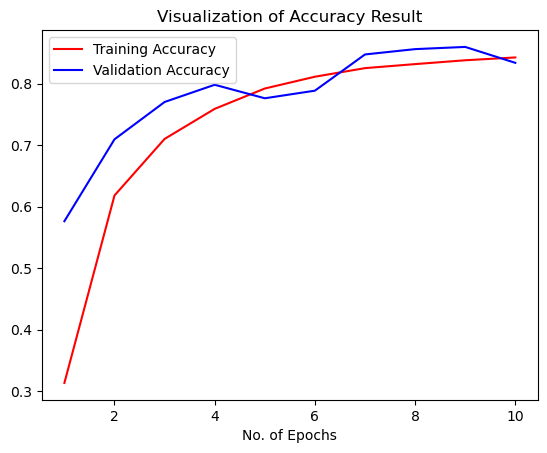

In [49]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [51]:
class_name = validation_set.class_names

In [53]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [55]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 647s 37ms/step


In [56]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [59]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [61]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [67]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.86      0.70      0.77       504
                                 Apple___Black_rot       0.95      0.85      0.90       497
                          Apple___Cedar_apple_rust       0.91      0.84      0.88       440
                                   Apple___healthy       0.85      0.78      0.81       502
                               Blueberry___healthy       0.93      0.82      0.87       454
          Cherry_(including_sour)___Powdery_mildew       0.90      0.86      0.88       421
                 Cherry_(including_sour)___healthy       0.86      0.97      0.91       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.77      0.83       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.74      0.93      0.

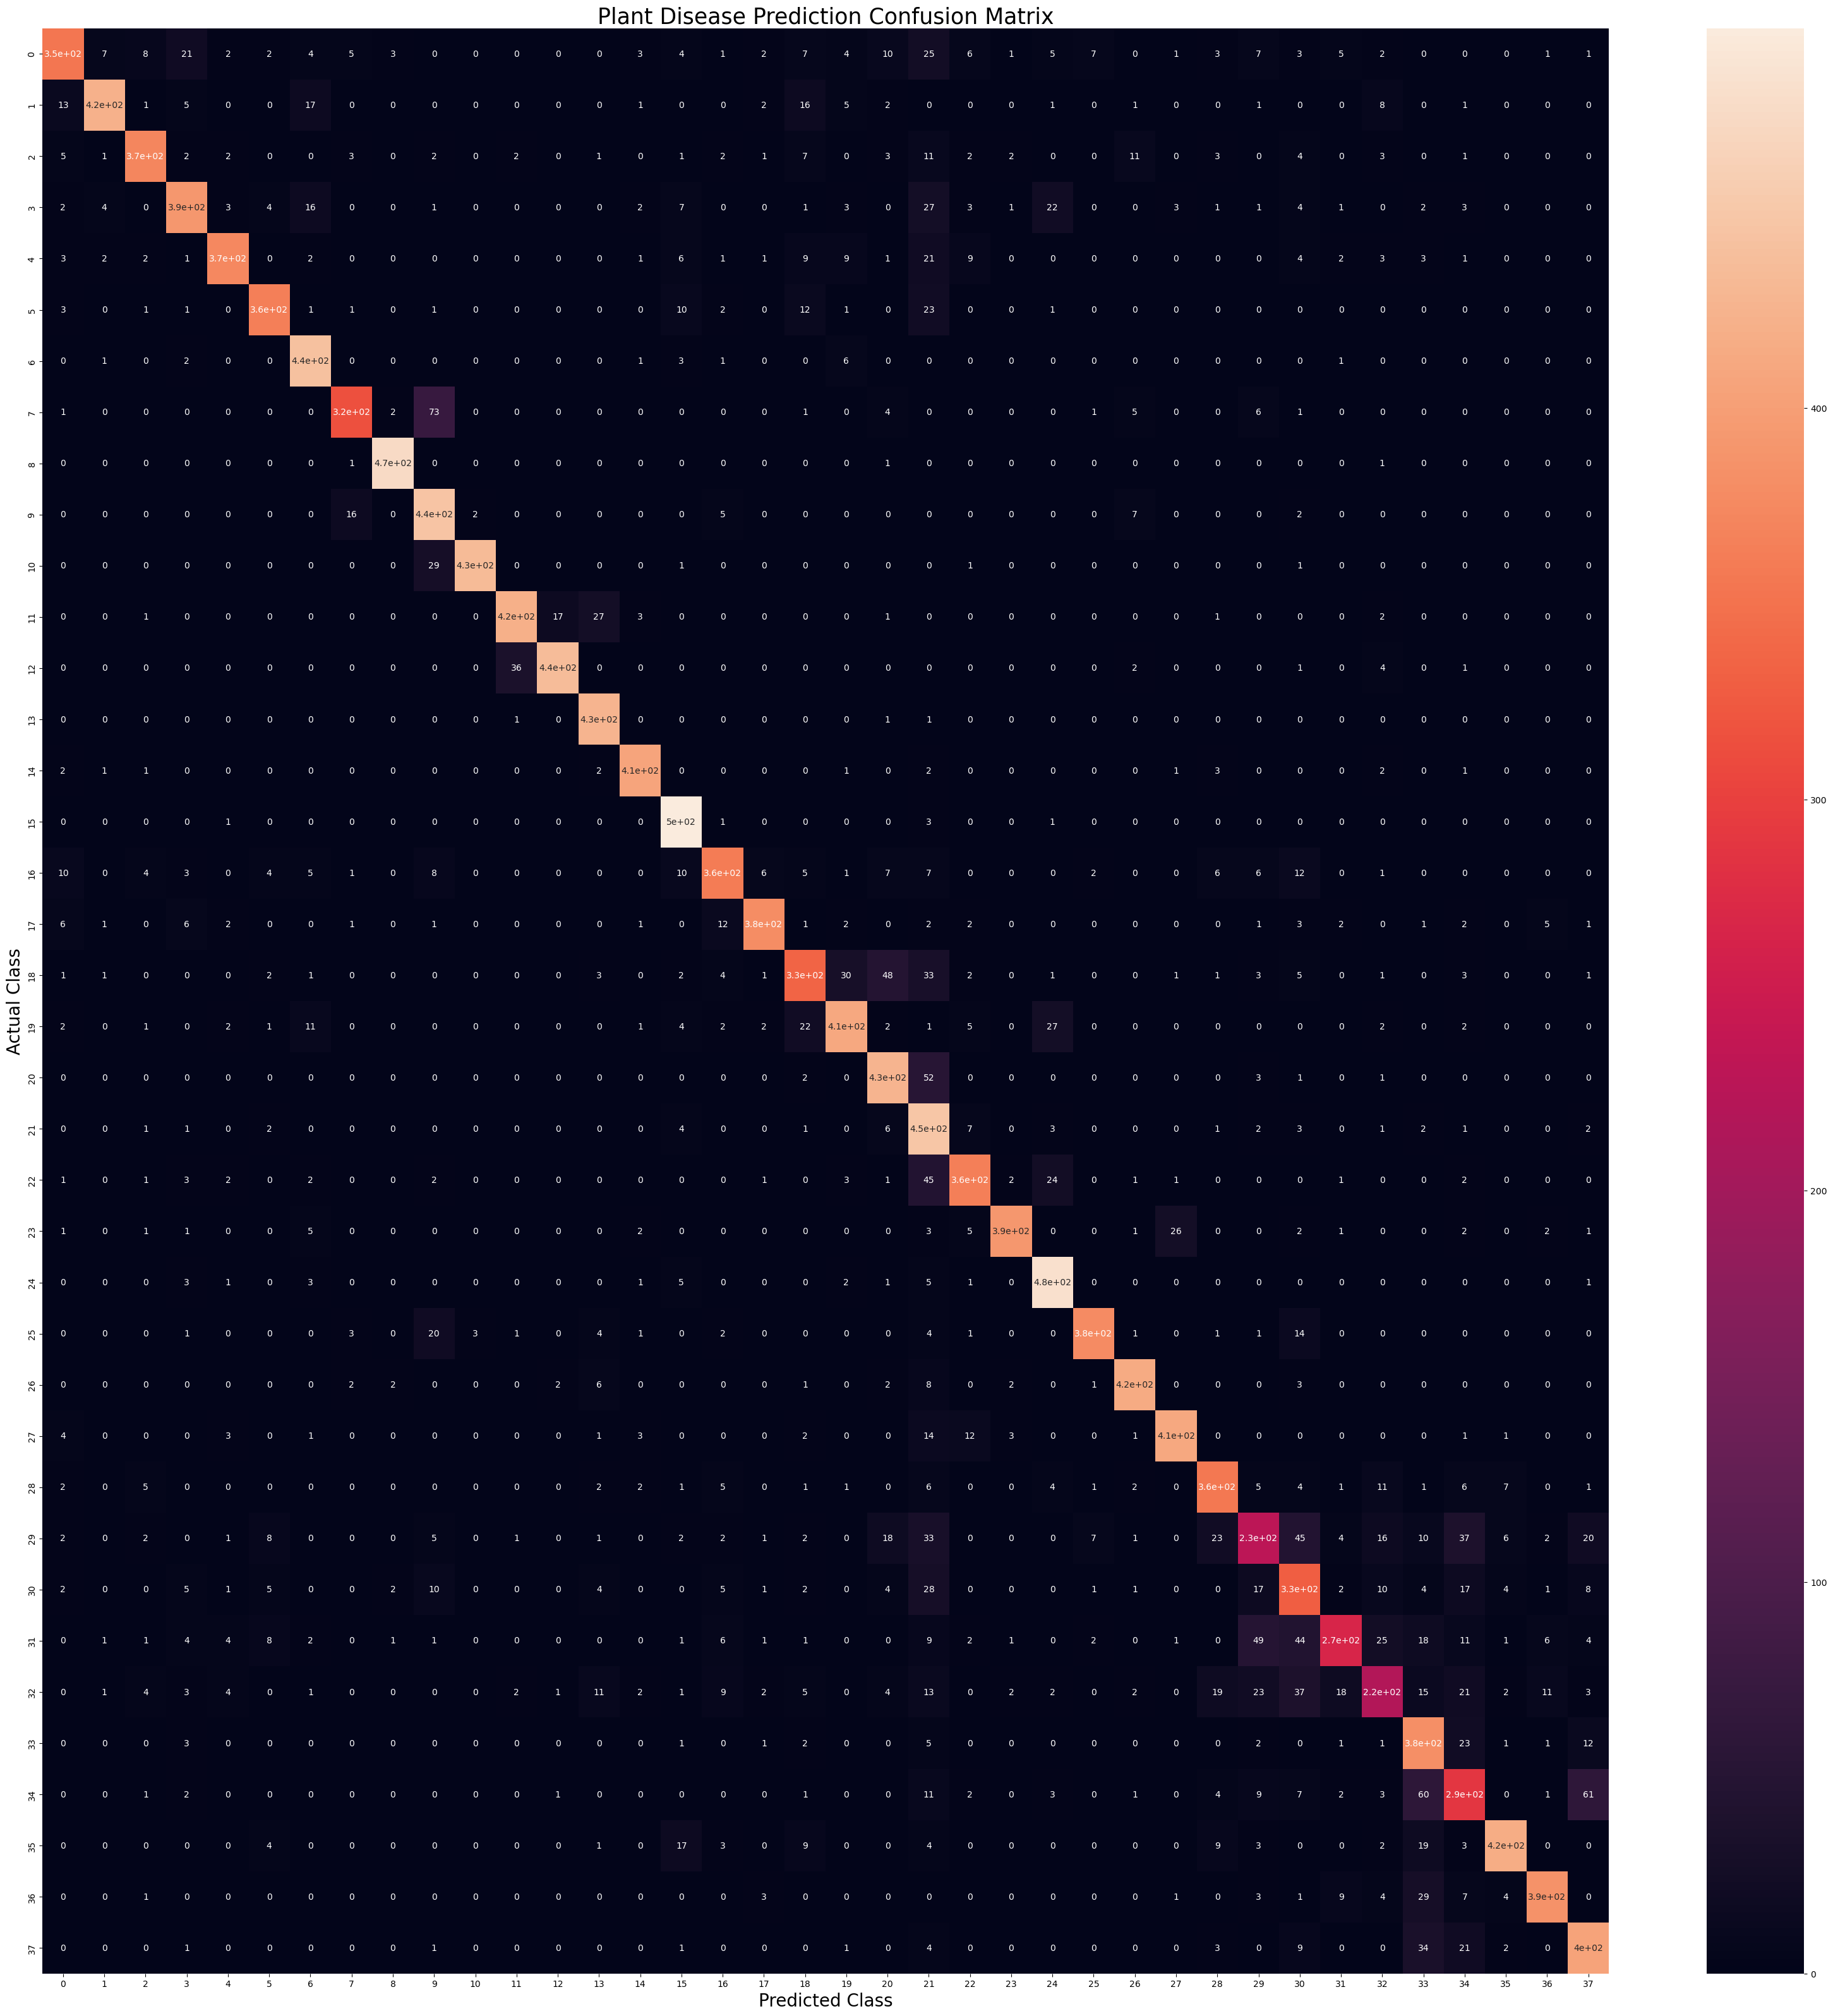

In [69]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()